In [111]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib

In [2]:
imdb_df = pd.read_csv('data/final_imdb.csv')

In [3]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312521 entries, 0 to 312520
Data columns (total 43 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   actors            312521 non-null  object 
 1   director          308472 non-null  object 
 2   duration          253937 non-null  float64
 3   genre             291314 non-null  object 
 4   imdb_rating       227843 non-null  float64
 5   link              312521 non-null  object 
 6   synopsis          312514 non-null  object 
 7   title             312520 non-null  object 
 8   votes             227843 non-null  float64
 9   page_url          312521 non-null  object 
 10  page_url_cleaned  312521 non-null  object 
 11  release_start     312388 non-null  float64
 12  release_month     312521 non-null  int64  
 13  action            312521 non-null  int64  
 14  adult             312521 non-null  int64  
 15  adventure         312521 non-null  int64  
 16  animation         31

In [28]:
imdb_df = imdb_df[imdb_df.duration <= 2000].reset_index(drop=True)

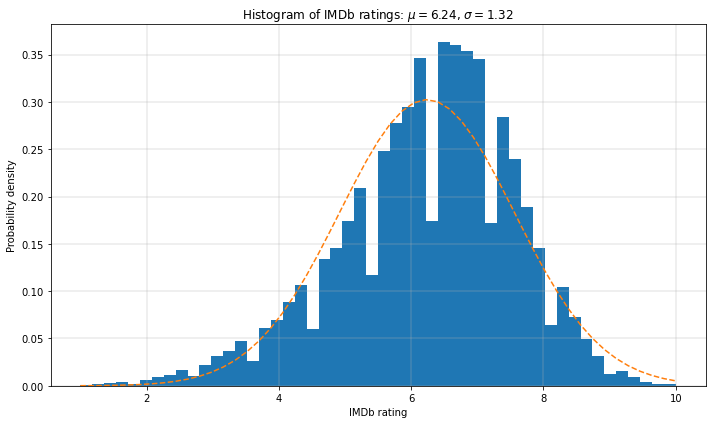

In [125]:
score_arr = imdb_df['imdb_rating']

# example data
mu = score_arr.mean()  # mean of distribution
sigma = score_arr.std()  # standard deviation of distribution

num_bins = 50

fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, linewidth=0.4)

# the histogram of the data
n, bins, patches = ax.hist(score_arr, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('IMDb rating')
ax.set_ylabel('Probability density')
ax.set_title(fr'Histogram of IMDb ratings: $\mu={round(mu, 2)}$, $\sigma={round(sigma, 2)}$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.savefig('plots/imdb_hist.png', dpi=300)

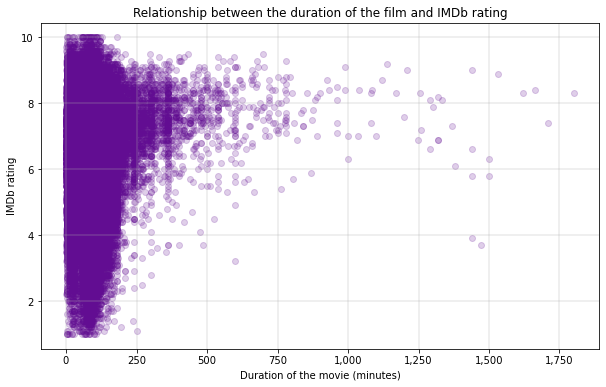

In [126]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True, linewidth=0.4)
plt.scatter(imdb_df['duration'], imdb_df['imdb_rating'], c='#620D92', alpha=0.2)

ax.set_xlabel('Duration of the movie (minutes)')
ax.set_ylabel('IMDb rating')
ax.set_title('Relationship between the duration of the film and IMDb rating')
ax.get_xaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

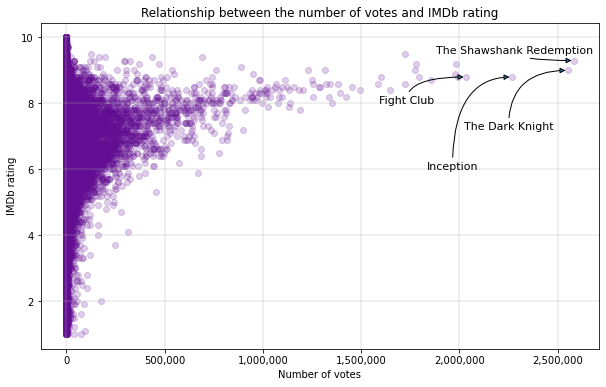

In [122]:
high_votes = imdb_df[imdb_df.votes >= 2000000][['title', 'votes', 'imdb_rating']].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True, linewidth=0.4)
plt.scatter(imdb_df['votes'], imdb_df['imdb_rating'], c='#620D92', alpha=0.2)
# Annotating the films with high votes
for i in range(high_votes.shape[0]):
    plt.annotate(high_votes['title'][i], 
                (high_votes['votes'][i], high_votes['imdb_rating'][i]), 
                (high_votes['votes'][i]-3e5, high_votes['imdb_rating'][i]+0.2-i),
                'data', 
                arrowprops=dict(arrowstyle="-|>", 
                connectionstyle="angle3", lw=1), 
                size=11, ha="center")

ax.set_xlabel('Number of votes')
ax.set_ylabel('IMDb rating')
ax.set_title('Relationship between the number of votes and IMDb rating')
ax.get_xaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [120]:
genres = ['action', 'adult', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'film-noir', 'game-show', 'history', 'horror',
       'music', 'musical', 'mystery', 'news', 'reality-tv', 'romance',
       'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'unknown', 'war',
       'western']
count_genres = []       
for i in genres:
    count_genres.append(sum(imdb_df[i]))


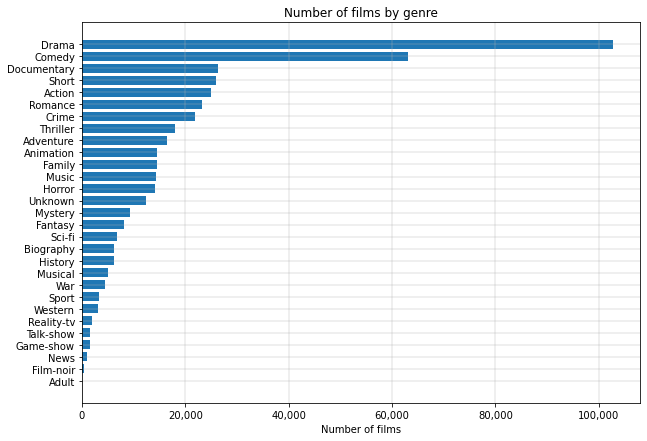

In [121]:
genres_bar = pd.DataFrame({'genre': genres, 'count_genres':count_genres}).sort_values('count_genres')

fig, ax = plt.subplots(figsize=(10, 7))
plt.grid(True, linewidth=0.4)
plt.barh(genres_bar['genre'].str.capitalize(), genres_bar['count_genres'])
ax.set_xlabel('Number of films')
ax.set_title('Number of films by genre')
ax.get_xaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

<Figure size 432x288 with 0 Axes>

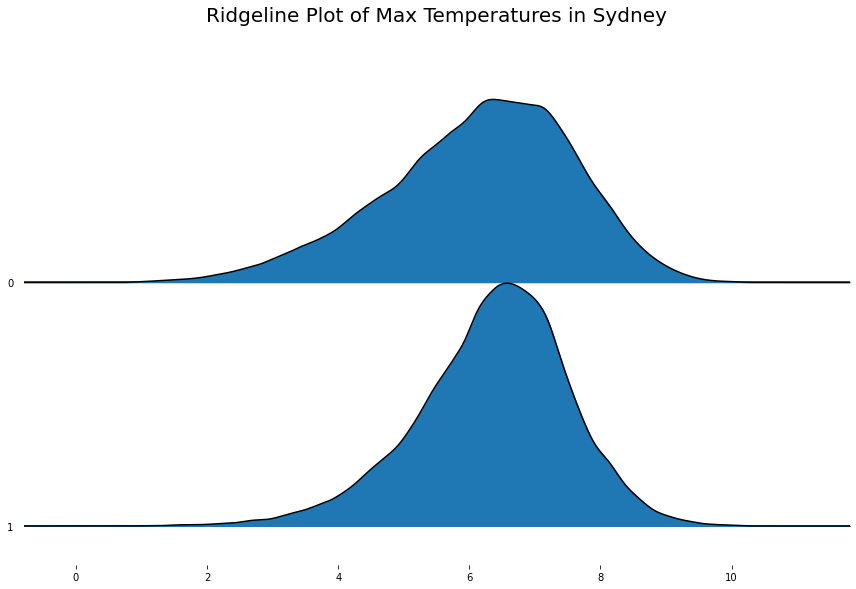

In [131]:
from joypy import joyplot

plt.figure()

joyplot(
    data=imdb_df[['drama', 'imdb_rating']], 
    by='drama',
    figsize=(12, 8)
)
plt.title('Ridgeline Plot of Max Temperatures in Sydney', fontsize=20)
plt.show()